In [104]:
!pip install mplcursors


     ---------------------------------------- 89.0/89.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21199 sha256=0f99ecfd0e4e90003ff1d0a90eab85b6ac8c44e5213998815561cf5caaee8139
  Stored in directory: c:\users\lawre\appdata\local\pip\cache\wheels\b1\98\ff\4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors

[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: C:\Users\lawre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import random
from datetime import datetime
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from datetime import datetime
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import concurrent.futures
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import lxml
import os
import random
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import lxml
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from datetime import datetime
import re
import base64
import pandas as pd
import pdfkit
from jinja2 import Template
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 
from difflib import get_close_matches


C:\Users\lawre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


# Funciones no principales para todos los codigos

In [84]:
def crear_driver():
    chromedriver_path = './chromedriver.exe'
    os.chmod(chromedriver_path, 0o755)
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    service = Service(executable_path=chromedriver_path)
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

def crear_driver_no_headless():
    chromedriver_path = './chromedriver.exe'
    os.chmod(chromedriver_path, 0o755)
    chrome_options = Options()
    chrome_options.add_argument("--disable-gpu")
    service = Service(executable_path=chromedriver_path)
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

def get_element_by_xpath(xpath, driver):
    #Esto solo sirve para esperar a que el elemento exista
    try:
        espera = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, xpath))
        )
    except:
        print("Revisar la funcion get_element_by_xpath")
    elemento = driver.find_element(By.XPATH, xpath)
    return elemento

def get_elements_by_xpath(xpath, driver):
    elementos = driver.find_elements(By.XPATH, xpath)
    return elementos

def click_button_by_xpath(bnt_xpath, driver):
    bnt = WebDriverWait(driver, 30).until(
        EC.element_to_be_clickable((By.XPATH, bnt_xpath))
    )
    ActionChains(driver).move_to_element(bnt).click().perform()

def click_with_js(element, driver):
    if isinstance(element, str):
        driver.execute_script(
            "arguments[0].click();", get_element_by_xpath(element, driver)
        )
    else:
        driver.execute_script("arguments[0].click();", element)

def write_in_xpath(xpath, text, driver):
    element = get_element_by_xpath(xpath, driver)
    try:
        element.clear()
    except:
        print("Input box cleared")
    element.send_keys(text)

def select_dropdown(select_xpath, element_text, driver):
    select_element = get_element_by_xpath(select_xpath, driver)
    select = Select(select_element)
    select.select_by_visible_text(element_text)

def devolver_texto_tabla(elemento):
    return elemento.text

def transformar_lista_selenium(elementos):
    lista_dividida = []
    for e in elementos:
        lista_dividida.append(e.text.replace("\n", " - "))
    return lista_dividida

def select_date_valuation(driver, year):
    time.sleep(random.uniform(1,2))
    click_button_by_xpath("//input[@name='ctl00$Contenido$txtFechaConsulta']", driver)
    #selecciono fecha de valoración - Enero = 0, Diciembre = 11
    fecha_actual = datetime.now()
    #Mes indica cuantos clicks en el calendario
    if fecha_actual.year == year:
        mes = fecha_actual.month - 1
        for i in range(mes):
            click_button_by_xpath("//a[@title='Sig']", driver)
        dia = fecha_actual.day
        click_button_by_xpath(f"//a[text()='{dia}']", driver)
    else:
        click_button_by_xpath(f"//a[text()='31']", driver)

def transformar_df_catastro(df_info, valor_localizacion):
    ultimo = valor_localizacion.split(" - ")[-1]
    ultimo_separacion = ultimo.split(" ")

    nueva_fila = pd.DataFrame({'info': ["Codigo postal"], 'valor': [ultimo_separacion[0]]})
    df_info = pd.concat([df_info, nueva_fila], ignore_index=True)

    texto = ultimo_separacion[1]+", "+ ultimo_separacion[2].replace("(", "").replace(")", "")
    nueva_fila = pd.DataFrame({'info': ["Municipio"], 'valor': [texto]})
    df_info = pd.concat([df_info, nueva_fila], ignore_index=True)

    #LOCALIZACION
    try:
        patron = r'^([^0-9]+[0-9]+)(.*)'
        resultado = re.search(patron, valor_localizacion)
        df_info.at[1, "valor"]=resultado.group(1)
    except:
        resultado = ""

    #FINCA REGISTRAL
    try:
        patron = r'F\.R\.\s*([^\s]+)'
        resultado = re.search(patron, valor_localizacion)
        nueva_fila = pd.DataFrame({'info': ["Finca Registral"], 'valor': [resultado.group(1)]})
        df_info = pd.concat([df_info, nueva_fila], ignore_index=True)
    except:
        resultado = ""

    #ESCALERA
    try:
        patron = r'Es:(\S+)'
        resultado = re.search(patron, valor_localizacion)
        nueva_fila = pd.DataFrame({'info': ["Escalera"], 'valor': [resultado.group(1)]})
        df_info = pd.concat([df_info, nueva_fila], ignore_index=True)
    except:
        resultado = ""

    #PLANTA
    try:
        patron = r'Pl:(\S+)'
        resultado = re.search(patron, valor_localizacion)
        nueva_fila = pd.DataFrame({'info': ["Planta"], 'valor': [resultado.group(1)]})
        df_info = pd.concat([df_info, nueva_fila], ignore_index=True)
    except:
        resultado = ""

    #PUERTA
    try:
        patron = r'Pt:(\S+)'
        resultado = re.search(patron, valor_localizacion)
        nueva_fila = pd.DataFrame({'info': ["Puerta"], 'valor': [resultado.group(1)]})
        df_info = pd.concat([df_info, nueva_fila], ignore_index=True)
    except:
        resultado = ""

    #DIVISION HORIZONTAL
    try:
        patron = r'DH.(\S+)'
        resultado = re.search(patron, valor_localizacion)
        nueva_fila = pd.DataFrame({'info': ["División Horizontal"], 'valor': [resultado.group(1)]})
        df_info = pd.concat([df_info, nueva_fila], ignore_index=True)
    except:
        resultado = ""
    return df_info

def get_image_file_as_base64_data(ruta_imagen):
    try:
        with open(ruta_imagen, "rb") as image_file:
            encoded_data = base64.b64encode(image_file.read()).decode("utf-8")
            return f"data:image/png;base64,{encoded_data}"
    except FileNotFoundError:
        print(f"No se pudo encontrar la imagen en la ruta: {ruta_imagen}")
        return None
    except Exception as e:
        print(f"Error al codificar la imagen: {e}")
        return None

# Información Catastro

In [32]:
def informacion_de_catastro(referencia_catastral):
# referencia_catastral = "5681101XG7858S0060SS"
    respuesta = {}
    construccion = pd.DataFrame()
    df_info = pd.DataFrame()

    url_catastro = "https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx?from=NuevoVisor&pest="
    response = requests.get(url_catastro)

    driver = crear_driver()
    driver.get(url_catastro)

    if response.status_code == 200:
        #Catastro
        write_in_xpath("//input[@name='ctl00$Contenido$txtRC2']", referencia_catastral, driver)
        #Acceder
        click_button_by_xpath("//input[@id='ctl00_Contenido_btnDatos']", driver)
        #Obtener la informacion
        info = driver.find_elements(By.XPATH, "//div[@id='ctl00_Contenido_tblInmueble']/div[@class='form-group']/span")
        info = transformar_lista_selenium(info)
        valor = driver.find_elements(By.XPATH, "//div[@id='ctl00_Contenido_tblInmueble']/div[@class='form-group']/div/span")
        valor = transformar_lista_selenium(valor)
        df_info["info"] = info
        df_info["valor"] = valor
        #Información de la tabla de abajo
        tabla = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, "//table[@id='ctl00_Contenido_tblLocales']"))
        )
        current_url = driver.current_url
        table_MN = pd.read_html(current_url, match="Uso principal")
        construccion = table_MN[0]

        #Obtener imagen de la finca
        click_button_by_xpath('//a[@class="cc-btn cc-allow" and contains(text(), "Aceptar cookies")]', driver)
        time.sleep(random.uniform(1, 1.25))
        click_button_by_xpath("//a[@id='ctl00_Contenido_AMostrarCarto']", driver)
        time.sleep(random.uniform(2, 3))
        driver.maximize_window()
        driver.save_screenshot(f"./fotoscatastro/{referencia_catastral}.png")
        image_url = driver.current_url

        # Manipulacion de los df 1
        fila_localizacion = df_info.loc[df_info['info'] == 'Localización']
        valor_localizacion = fila_localizacion['valor'].values[0]
        df_info = transformar_df_catastro(df_info, valor_localizacion)

        #Manipulacion 2
        c = ["Escalera", "Planta","Puerta"]
        construccion_modificado = construccion.copy()
        construccion_modificado[c] = construccion_modificado[c].fillna(0).astype(int)
        construccion_modificado = construccion_modificado.dropna(axis=1, how='all')
        

        respuesta["df_tabla_info_1_catastro"] = df_info
        respuesta["df_tabla_info_2_catastro"] = construccion_modificado.fillna("")
        respuesta["imagen_ruta"] = f"./fotoscatastro/{referencia_catastral}.png"
        respuesta["link"] = image_url
    else:
        print(f"Error al obtener la página. Código de estado: {response.status_code}")

    return respuesta 


# Valoración de Catastro

In [31]:
#Funcion que busca la información de todos los años disponibles
def valoracion_de_catastro(referencia_catastral, year):
    respuesta = {}
    df = pd.DataFrame()

    url_catastro = "https://www1.sedecatastro.gob.es/Accesos/SECAccvr.aspx"
    response = requests.get(url_catastro)

    driver = crear_driver()
    driver.get(url_catastro)

    if response.status_code == 200:
        #cockies
        click_button_by_xpath("//a[text()='Aceptar cookies']", driver)
        #abro año)
        click_button_by_xpath(f"//a[text()='VALORES DE REFERENCIA PARA EL EJERCICIO {year}']", driver)
        #abro valoracion
        click_button_by_xpath(f"//a[@id='a{year}7']", driver)
        #info DNI
        write_in_xpath("//input[@name='ctl00$Contenido$nif']", "11856045M", driver)
        #Numero de soporte
        write_in_xpath("//input[@name='ctl00$Contenido$soporte']", "BJK120596", driver)
        #Boton acceder
        click_button_by_xpath("//button[@id='ctl00_Contenido_bAceptar']", driver)
        #Finalidad
        select_dropdown("//select[@id='ctl00_Contenido_ddlFinalidad']", "Otras", driver)
        #Texto finalidad
        write_in_xpath("//textarea[@id='ctl00_Contenido_txtFinalidad']", "Otros motivos", driver)
        #Seleccion fecha
        select_date_valuation(driver, year)
        #Referencia
        write_in_xpath("//input[@id='ctl00_Contenido_txtRC2']", referencia_catastral, driver)
        #cockies
        click_button_by_xpath("//a[text()='Aceptar cookies']", driver)
        #valorar
        time.sleep(random.uniform(2,3))
        click_button_by_xpath("//input[@name='ctl00$Contenido$btnValorReferencia']", driver)
        #Informacion
        time.sleep(random.uniform(1,1.2))
        info = driver.find_elements(By.XPATH, "//div[@class='form-group']/span")
        info = transformar_lista_selenium(info)
        valor = driver.find_elements(By.XPATH, "//div[@class='form-group']/div/span")
        valor = transformar_lista_selenium(valor)
        df["info"] = info
        df["valor"] = valor

        respuesta["Year"] = year

        fila_seleccionada = df.loc[df['info'] == "Valor de Referencia"]
        valor_info = fila_seleccionada['valor'].values[0]
        respuesta["Price"] = float(valor_info.split(" ")[0].replace(".", "").replace(",", "."))

        respuesta["df_valoracaion_catastro"] = df
        
        return respuesta

def valoracion_total_de_catastro(referencia_catastral):
    informacion_historica = []
    dic_informacion_historica_ordenada ={}
    dic_informacion_historica_final = {}
    url_catastro = "https://www1.sedecatastro.gob.es/Accesos/SECAccvr.aspx"
    response = requests.get(url_catastro)

    driver = crear_driver()
    driver.get(url_catastro)

    if response.status_code == 200:
        #cockies
        click_button_by_xpath("//a[text()='Aceptar cookies']", driver)
        #Numero de hilos necesarios:
        years = get_elements_by_xpath("//a[contains(text(), 'VALORES DE REFERENCIA PARA EL EJERCICIO')]", driver)
        num_years = len(years)
        driver.quit()

    argumentos = range(2022, 2022 + 3)

    with concurrent.futures.ThreadPoolExecutor(max_workers=num_years) as executor:
        resultados = list(executor.map(lambda year: valoracion_de_catastro(referencia_catastral, year), argumentos))

    for i, resultado in enumerate(resultados):
        informacion_historica.append(resultado)
    
    informacion_historica_ordenada = sorted(informacion_historica, key=lambda x: x["Year"])

    for diccionario in informacion_historica_ordenada:
        clave = diccionario["Year"]
        dic_informacion_historica_ordenada[clave] = diccionario

    dic_informacion_historica_final["dic_informacion_historica_final"]=dic_informacion_historica_ordenada

    return dic_informacion_historica_final


# Registradores
- Hay que aceptar a mano el certificado que se quiere usar

In [223]:
#FUNCIONES GENERICAS
#Ejecuto un script que me permite seleccionar los elementos de la tabla
def ejecutar_script(driver):
    time.sleep(random.uniform(3, 5))
    script='''
    var elements = document.querySelectorAll(".select2-result-label");
    var contents = [];

    elements.forEach(function(element) {
        element.click();
        var data = {
            content: element.textContent.trim(),
            id: element.getAttribute("id")
        };
        contents.push(data);
    });

    return contents;
    '''
    return driver.execute_script(script)

#Selecciono de la lista que elemento quiero al final
def pulsar_por_id(id, driver):
    id = f"//div[@id='{id}']"
    element = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, id)
    ))
    element.click()

#Selecciono texto de la tabla
def seleccion_opciones_tabla(target, driver):
    result = ejecutar_script(driver)
    contenidos = [diccionario['content'] for diccionario in result]
    try:
        match_cercano = get_close_matches(target, contenidos, n=1)[0]
        diccionario_resultado = next(item for item in result if item['content'] == match_cercano)
        pulsar_por_id(diccionario_resultado["id"], driver)
    except:
        print("No se ha seleccionado la tabla bien")

#Selecciono numero de la tabla
def seleccion_opciones_tabla_nunmero(target, driver):
    result = ejecutar_script(driver)
    diccionario_mas_cercano = min(result, key=lambda d: abs(int(d['content']) - target))
    pulsar_por_id(diccionario_mas_cercano["id"], driver)

#-----------------------------------------------------

#FUNCIONES ESPECIFICAS
#Seleccion del municipio
def seleccion_parametros_registradores_municipio(respuesta_final, driver):
    #Boton municipios
    click_button_by_xpath("//span[@id='select2-chosen-2']", driver)
    write_in_xpath("//input[@id='s2id_autogen2_search']",respuesta_final['df_tabla_info_1_catastro'].valor[7].split(",")[0], driver)
    time.sleep(random.uniform(2, 2.3))
    #Proceso que elemento quiero buscar
    target = respuesta_final['df_tabla_info_1_catastro'].valor[7].replace(",", "")
    #Selecciono que elemento es el más parecido
    seleccion_opciones_tabla(target, driver)

#Seleccion de la calle
def seleccion_calle_registradores(respuesta_final, driver):
    #Calle que quiero buscar
    res_final = re.sub(r'\d+$', '', respuesta_final['df_tabla_info_1_catastro'].valor[1])
    #Escribo la calle
    time.sleep(random.uniform(2, 2.3))
    click_button_by_xpath("//div[@id='s2id_autogen3']", driver)
    time.sleep(random.uniform(2, 2.3))
    write_in_xpath("//input[@id='s2id_autogen4_search']",res_final, driver)
    time.sleep(random.uniform(2, 2.3))
    #Proceso que elemento quiro buscar
    target = res_final
    #Selecciono que elemento es el más parecido
    diccionario_resultado = seleccion_opciones_tabla(target, driver)

#Seleccion del numero de la calle
def seleccion_numero_calle_registradores(respuesta_final, driver):
    #Numero de la calle
    numero = int(re.findall(r'\d+$', respuesta_final['df_tabla_info_1_catastro'].valor[1])[0])
    click_button_by_xpath("//span[@id = 'select2-chosen-6']", driver)
    write_in_xpath("//input[@id='s2id_autogen6_search']",numero, driver)
    time.sleep(random.uniform(2, 2.3))
    seleccion_opciones_tabla_nunmero(numero, driver)

#Seleccion de la superficie
def seleccion_superficie(respuesta_final, driver):
    superficie = respuesta_final['df_tabla_info_1_catastro'].valor[4].split(" ")[0]
    click_button_by_xpath("//input[@class='input-block-level ng-pristine ng-valid ng-valid-number ng-valid-min']", driver)
    write_in_xpath("//input[@class='input-block-level ng-pristine ng-valid ng-valid-number ng-valid-min']",superficie, driver)

#Seleccion año de construccion
def seleccion_year_cosntruccion(respuesta_final, driver):
    year_construccion = respuesta_final['df_tabla_info_1_catastro'].valor[5]
    click_button_by_xpath("//input[@class='input-block-level ng-pristine ng-valid ng-valid-number ng-valid-min']", driver)
    write_in_xpath("//input[@class='input-block-level ng-pristine ng-valid ng-valid-number ng-valid-min']",year_construccion, driver)

#Obtencion de comparables
def comparables_registradores_por_paridad(paridad, driver):
    lista_comparables = []
    comparables = get_elements_by_xpath(f"//div[@class = 'ng-scope ngRow {paridad}']", driver)
    for c in comparables:
        comparable = c.text.split("\n")
        lista_procesada = [cadena.strip() for cadena in comparable]
        lista_comparables.append(lista_procesada)
    return lista_comparables

def comparables_registradores(driver):
    lista_par = comparables_registradores_por_paridad("even", driver)
    lista_impar = comparables_registradores_por_paridad("odd", driver)
    lista_comparables = lista_par + lista_impar
    return lista_comparables

#Seleccionar los + para añadir los comparables a la valoracion
def add_comparables_a_valoracion(driver):
    buttons = get_elements_by_xpath("//button[@class = 'btn btn-xs']", driver)
    for b in buttons:
        #Añadir cada comparable a la valoracion
        b.click()
        time.sleep(random.uniform(0.5, 1))
        #Aceptar el pop-up
        try:
            WebDriverWait(driver, 10).until(EC.alert_is_present())
            alert = driver.switch_to.alert
            alert.accept()
        except Exception as e:
            print(f"No se encontró el pop-up: {e}")

#Obtencion de resumen de valoración (arriba drch en Registradores)
def resumen_estimación(driver):
    filas_final = []
    header = get_element_by_xpath("//table[@class = 'table table-environment']", driver).text.split("\n")
    header.pop(0)
    mi_lista = [elemento.replace('€', '') for elemento in header]
    grupos_de_tres = [mi_lista[i:i + 3] for i in range(0, len(mi_lista), 3)]
    for mi_lista in grupos_de_tres:
        elementos_separados = [elemento for cadena in mi_lista for elemento in cadena.split()]
        filas_final.append(elementos_separados)
    filas_final[-1].pop(0)
    df_resumen = pd.DataFrame(filas_final, columns=['', 'Núm.', 'Sup. media', 'Ant. media', 'Precio m2', 'Valor', 'Valor estimado'])
    return df_resumen

#Add comparables a valoracion
def add_comparables_a_valoracion(driver):
    buttons = get_elements_by_xpath("//button[@class = 'btn btn-xs']", driver)
    for b in buttons:
        #Añadir cada comparable a la valoracion
        b.click()
        time.sleep(random.uniform(0.5, 1))
        #Aceptar el pop-up
        try:
            WebDriverWait(driver, 10).until(EC.alert_is_present())
            alert = driver.switch_to.alert
            alert.accept()
        except Exception as e:
            print(f"No se encontró el pop-up: {e}")

#Invoca todas las funciones necesarias (logica principal)
def principal_registradores(respuesta_final, driver):
    lista_errores = []

    try:
        seleccion_calle_registradores(respuesta_final, driver)
    except:
        lista_errores.append("seleccion_calle_registradores")

    time.sleep(random.uniform(2, 3.3))

    try:
        seleccion_superficie(respuesta_final, driver)
    except:
        lista_errores.append("seleccion_superficie")

    time.sleep(random.uniform(2, 2.3))

    try:
        seleccion_numero_calle_registradores(respuesta_final, driver)
    except:
        lista_errores.append("seleccion_numero_calle_registradores")

    time.sleep(random.uniform(2, 2.3))

    try:
        seleccion_year_cosntruccion(respuesta_final, driver)
    except:
        lista_errores.append("seleccion_year_cosntruccion")

    time.sleep(random.uniform(2, 2.3))

    try:
        seleccion_parametros_registradores_municipio(respuesta_final, driver)
    except:
        lista_errores.append("seleccion_parametros_registradores_municipio")

    if "seleccion_parametros_registradores_municipio" in lista_errores:
        seleccion_parametros_registradores_municipio(respuesta_final, driver)
    if "seleccion_calle_registradores" in lista_errores:
        seleccion_calle_registradores(respuesta_final, driver)
    if "seleccion_superficie" in lista_errores:
        seleccion_superficie(respuesta_final, driver)
    if "seleccion_numero_calle_registradores" in lista_errores:
        seleccion_numero_calle_registradores(respuesta_final, driver)
    if "seleccion_year_cosntruccion" in lista_errores:
        seleccion_year_cosntruccion(respuesta_final, driver)

    try:
        #Acceso a Datos
        time.sleep(random.uniform(7, 10))
        click_button_by_xpath("//label[@class = 'btn btn-default btn-sm ng-pristine ng-valid']", driver)

        #Obtener la cabecera de los comparables
        time.sleep(random.uniform(2, 3))
        header = get_element_by_xpath("//div[@class = 'ngHeaderScroller']", driver).text.split("\n")
        cabecera_comparables_registradores = [cadena.strip() for cadena in header]
    except:
        #Acceso a Datos
        time.sleep(random.uniform(7, 10))
        click_button_by_xpath("//label[@class = 'btn btn-default btn-sm ng-pristine ng-valid']", driver)

        #Obtener la cabecera de los comparables
        time.sleep(random.uniform(2, 3))
        header = get_element_by_xpath("//div[@class = 'ngHeaderScroller']", driver).text.split("\n")
        cabecera_comparables_registradores = [cadena.strip() for cadena in header]
        
    #Obtengo los comparables
    comparables = comparables_registradores(driver)

    #Comprobar
    df_comparables = pd.DataFrame(comparables, columns=cabecera_comparables_registradores)
    
    #Añadir comparables a la valoracion
    add_comparables_a_valoracion(driver)

    #Obtener resumen
    time.sleep(random.uniform(5, 6))
    resumen = resumen_estimación(driver)

    respuesta_registradores = {}
    respuesta_registradores["Comparables"] = df_comparables
    respuesta_registradores["Valoracion"] = resumen

    return respuesta_registradores

#MAIN FUNCION DE REGISTRADORES
def main_registradores(respuesta_final):
    url_catastro = "https://valoracioninmobiliaria.registradores.org/mvi/login-cert"
    response = requests.get(url_catastro)

    driver = crear_driver_no_headless()
    driver.get(url_catastro)
    driver.maximize_window()

    if response.status_code == 200:
        click_button_by_xpath("//input[@class='ng-pristine ng-invalid ng-invalid-required']",driver)
        click_button_by_xpath("//button[@class='btn btn-lg btn-primary btn-block']",driver)
        time.sleep(random.uniform(2, 3))
        sol = principal_registradores(respuesta_final, driver)
    else:
        print(f"Error al obtener la página. Código de estado: {response.status_code}")
    
    return sol

# Exportar a HTML-PDF

In [329]:
def exportar(catastro, respuesta_final, grafica_catastro):

    información_html = {
        "catastro": catastro, 
        "seccion1_contenido1": respuesta_final["df_tabla_info_1_catastro"].style.hide_index().hide_columns().render(),
        "seccion1_contenido2": respuesta_final["df_tabla_info_2_catastro"].style.hide_index().render(),
        "ruta_imagen": get_image_file_as_base64_data(respuesta_final["imagen_ruta"]),
        "seccion2_contenido": list(respuesta_final["dic_informacion_historica_final"].items())[-1][-1]["df_valoracaion_catastro"].style.hide_index().hide_columns().render(),
        "grafica_valor_catastro": grafica_catastro,
        "link_catastro" : respuesta_final["link"],
        "valoracion_registradores": respuesta_final["Registradores"]["Valoracion"].style.hide_index().render(),
        "comparables_registradores": respuesta_final["Registradores"]["Comparables"].style.hide_index().render(),
        "Valoracion": respuesta_final["Valores_valoracion"],
    }

    # Cargar la plantilla desde el archivo
    with open('index.html', 'r', encoding='utf-8') as template_file:
        template_content = template_file.read()

    # Crear un objeto Template de Jinja2
    template = Template(template_content)

    # Renderizar la plantilla con los datos
    html_output = template.render(información_html)

    # Escribir el resultado en un archivo HTML
    with open('output.html', 'w', encoding='utf-8') as output_file:
        output_file.write(html_output)

    print("Se ha creado el archivo HTML: output.html")

    path_wkhtmltopdf = r'C:\Archivos de programa\wkhtmltopdf\bin\wkhtmltopdf.exe'
    config = pdfkit.configuration(wkhtmltopdf=path_wkhtmltopdf)
    options = {
        'encoding': 'utf-8',
        'image-dpi': 300,    # Ajusta la resolución de la imagen (dpi)
        'page-size': 'A4',   # Tamaño de página (puedes ajustar según tus necesidades)
        # 'margin-top': '10mm',
        # 'margin-right': '10mm',
        # 'margin-bottom': '10mm',
        # 'margin-left': '10mm',
    }
    pdfkit.from_file('output.html', 'out.pdf', configuration=config, options=options)

    print("Se ha creado y llenado el PDF: out.pdf")

def crear_gráfica_evolucion_precio(respuesta_final):
    ultimo_elemento = list(respuesta_final["dic_informacion_historica_final"].items())
    years, data_dict = zip(*ultimo_elemento)
    years = list(years)
    prices = [elemento['Price'] for elemento in data_dict]
    prices_org = prices.copy()
    prices_cpi = prices.copy()

    #prediccion en base a crecimiento historico
    for _ in range(2):
        precio_actual = prices_org[-1]
        precio_anterior = prices_org[-2]
        precio_predicho = precio_actual + (precio_actual - precio_anterior) / 2
        prices_org.append(precio_predicho)
        years.append(years[-1]+1)
        
    #prediccion en base a CPI
    cpi = 1 + ((3.1 +3.8) / 2)/100
    for _ in range(2):
        nuevo_valor = prices_cpi[-1] * cpi
        prices_cpi.append(nuevo_valor)

    # Dataset
    x=np.array(years)

    prices_org = [valor / 1000 for valor in prices_org]
    y=np.array(prices_org)
    prices_cpi = [valor / 1000 for valor in prices_cpi]
    y2=np.array(prices_cpi) 

    #CRECIMIENTO EN FUNCION DEL IPC
    cubic_interpolation_model = interp1d(x, y, kind = "cubic")

    # Plotting the Graph
    X_=np.linspace(x.min(), x.max(), 500)
    Y_=cubic_interpolation_model(X_)

    fig, ax = plt.subplots()#figsize=(6, 12))
    current_year = datetime.now().year
    plt.plot(X_[:len(X_[X_ <= current_year])], Y_[:len(X_[X_ <= current_year])], linestyle='-', color='navy', label='Historico')
    plt.plot(X_[len(X_[X_ <= current_year])-1:], Y_[len(X_[X_ <= current_year])-1:], linestyle='--', color='navy', label='Estimación')
    plt.title("Evolución Historica Valor Catastral")
    plt.xlabel("Año")
    plt.xticks(years)
    plt.ylabel("Valor (k€)")

    # Agregar la línea para y2
    cubic_interpolation_model_y2 = interp1d(x, y2, kind="cubic")
    Y2_ = cubic_interpolation_model_y2(X_)
    plt.plot(X_[len(X_[X_ <= current_year])-1:], Y2_[len(X_[X_ <= current_year])-1:], linestyle='--', color='green', label='CPI')

    min_y = min(Y2_)
    plt.fill_between(X_[len(X_[X_ <= current_year])-1:], Y2_[len(X_[X_ <= current_year])-1:], y2=min_y, color='green', alpha=0.05)

    # Ocultar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05))

    for x, y_val, y2_val in zip(years, prices_org, prices_cpi):
        plt.hlines(y=y_val, xmin=min(years), xmax=x, color='navy', linestyle='--', linewidth=0.2)
        plt.hlines(y=y2_val, xmin=min(years), xmax=x, color='green', linestyle='--', linewidth=0.2)


    evolucion_catastro_html = mpld3.fig_to_html(fig)
    
    return evolucion_catastro_html

def comparacion_valoraciones(origenes, valores):
    # Calcular la media de los valores
    estimacion_media = np.mean(valores)
    limite_x_inferior = min(valores)
    limite_x_superior = max(valores)

    # Crear el gráfico de barras horizontal
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(origenes, valores, color='lightgray')

    # Etiquetas en cada barra
    for bar, valor, categoria in zip(bars, valores, origenes):
        print(bar, valor, categoria)
        if valor >= estimacion_media:
            bar.remove()
            ax.barh(categoria, [valor - estimacion_media], left=[estimacion_media], color='navy')
            ax.text(valor+5000, origenes.index(categoria), f'{valor}', va='center', ha='left', color='black', fontweight='bold')
        else:
            left, width = bar.get_x(), bar.get_width()
            bar.remove()
            ax.barh(categoria, [estimacion_media - width], left=[left + width], color='navy')
            ax.text(valor-5000, origenes.index(categoria), f'{valor}', va='center', ha='right', color='black', fontweight='bold')


    # Línea punteada para la media
    ymin, ymax = plt.ylim()
    vertical_line_x = [estimacion_media, estimacion_media]
    vertical_line_y = [ymin, ymax]
    plt.plot(vertical_line_x, vertical_line_y, color='red', linestyle='--', label=f'Valor estimación: {estimacion_media}')


    # Ocultar bordes (ejes) del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ocultar ticks de los ejes
    # print(origenes)
    # ax.set_yticks(range(len(origenes)))
    # ax.set_yticklabels(origenes) 

    # Personalizar el gráfico
    ax.set_xlabel('Valoraciones')
    ax.set_ylabel('Orígenes')
    ax.legend()

    plt.xlim(limite_x_inferior - 50000, limite_x_superior + 50000)

    # Ajustar el diseño para que las etiquetas no se corten
    plt.tight_layout()

    com_valoraciones = mpld3.fig_to_html(fig)

    html_str = mpld3.fig_to_html(fig)
    Html_file= open("test.html","w")
    Html_file.write(html_str)
    Html_file.close()
    
    return com_valoraciones



# Main
- Ejecuta cada codigo en procesos distintos

In [ ]:
from concurrent.futures import ThreadPoolExecutor

catastro = "2594806VK4729D0001JO"
funciones = [informacion_de_catastro, valoracion_total_de_catastro]
respuesta_final = {}

with ThreadPoolExecutor() as executor:
    futures = [executor.submit(func, catastro) for func in funciones]

    # Obtener los resultados a medida que se completen
    for futuro in futures:
        resultado = futuro.result()
        print(resultado)
        respuesta_final.update(resultado)

#REGISTRADORES - Necesito info de la respuesta final de catastro
sol_registradores = main_registradores(respuesta_final)
respuesta_final["Registradores"] = sol_registradores


Rectangle(xy=(0, -0.4), width=956346, height=0.8, angle=0) 956346.07 Referencia catastal
Rectangle(xy=(0, 0.6), width=1.3884e+06, height=0.8, angle=0) 1388404.2 Registradores (Genérica)
Rectangle(xy=(0, 1.6), width=1.21655e+06, height=0.8, angle=0) 1216553.24 Registradores (Comparables)


C:\Users\lawre\AppData\Local\Temp\ipykernel_11208\3576222951.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  "seccion1_contenido1": respuesta_final["df_tabla_info_1_catastro"].style.hide_index().hide_columns().render(),
C:\Users\lawre\AppData\Local\Temp\ipykernel_11208\3576222951.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='columns')`
  "seccion1_contenido1": respuesta_final["df_tabla_info_1_catastro"].style.hide_index().hide_columns().render(),
C:\Users\lawre\AppData\Local\Temp\ipykernel_11208\3576222951.py:5: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  "seccion1_contenido1": respuesta_final["df_tabla_info_1_catastro"].style.hide_index().hide_columns().render(),
C:\Users\lawre\AppData\Local\Temp\ipykernel_11208\3576222951.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  "seccion1_contenido2": respuesta_final["df_tabla_info_2_catastro"].sty

Se ha creado el archivo HTML: output.html
Se ha creado y llenado el PDF: out.pdf


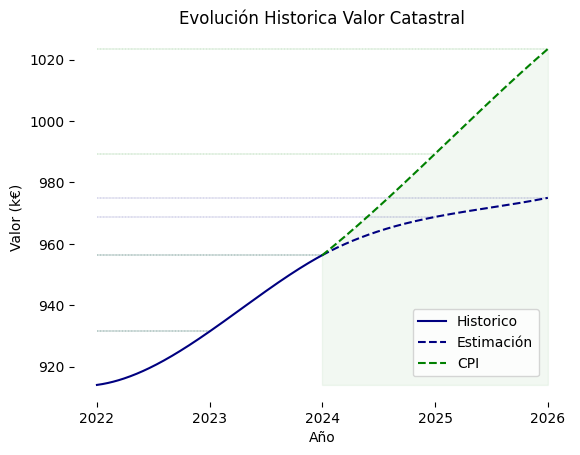

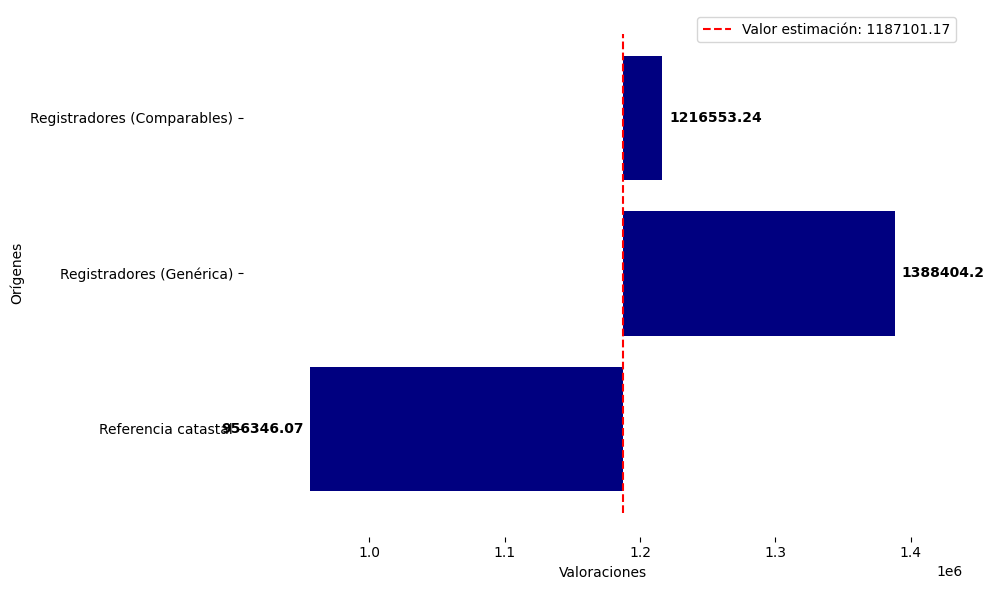

In [330]:
# ---------------------------------------------------------
#GRAFICAS
    #catasrtro
grafica_catastro = crear_gráfica_evolucion_precio(respuesta_final)
    #Compracacion valoraciones
origenes_comparacion = ["Referencia catastal", "Registradores (Genérica)", "Registradores (Comparables)"]
valores_comparacion = [
    #Valoracion catastral, ultimo año (2024)
    float(list(respuesta_final["dic_informacion_historica_final"].items())
          [-1][-1]["df_valoracaion_catastro"]["valor"]
          .tolist()[-1].split(" ")[0]
          .replace(".", "")
          .replace(",", ".")),
    #Valoracion Idealiesta
    #Valoracion Automatica Registradores
    float(list(respuesta_final["Registradores"].items())
          [-1][-1]["Valor estimado"]
          .tolist()[-2].split(" ")[0]
          .replace(".", "").replace(",", ".")),
    #Valoracion Selección Registradores
    float(list(respuesta_final["Registradores"].items())
          [-1][-1]["Valor estimado"]
          .tolist()[-1].split(" ")[0]
          .replace(".", "").replace(",", "."))
]
comparacion_valoraciones_grafica = comparacion_valoraciones(origenes_comparacion, valores_comparacion)
respuesta_final["Valores_valoracion"] = comparacion_valoraciones_grafica

#EXPORTAR
exportar(catastro, respuesta_final, grafica_catastro)

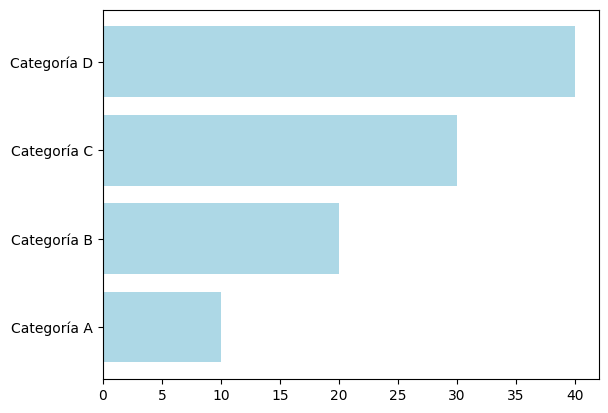

In [310]:
import matplotlib.pyplot as plt

# Datos de ejemplo
categorias = ['Categoría A', 'Categoría B', 'Categoría C', 'Categoría D']
valores = [10, 20, 30, 40]

# Crear el gráfico de barras horizontal
fig, ax = plt.subplots()
bars = ax.barh(categorias, valores, color='lightblue')

# Personalizar el eje y con las categorías directamente
ax.set_yticks(range(len(categorias)))
ax.set_yticklabels(categorias)

# Mostrar el gráfico
plt.show()


# Development--------------------------------------------------------

In [ ]:
import contextlib
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.serialization import load_der_private_key
import OpenSSL.crypto
import os
import requests
import tempfile

@contextlib.contextmanager
def pfx_to_pem(pfx_path, pfx_password):
    ''' Decrypts the .pfx file to be used with requests. '''
    t_pem = tempfile.NamedTemporaryFile(suffix='.pem', delete=False)
    try:
        pfx_data = open(pfx_path, 'rb').read()
        p12 = OpenSSL.crypto.load_pkcs12(pfx_data, pfx_password)
        
        private_key = serialization.load_der_private_key(
            p12.get_privatekey().to_der(),
            password=pfx_password.encode('utf-8'),
            backend=default_backend()
        )
        
        pem_data = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )

        t_pem.write(pem_data)
        t_pem.close()  # Cerrar explícitamente el archivo antes de salir del bloque 'try'
        yield t_pem.name
    finally:
        os.unlink(t_pem.name)

# HOW TO USE:
with pfx_to_pem('Certificado SERGIO GUILARTE OLIVA.pfx', '1234') as cert:
    url_catastro = "https://valoracioninmobiliaria.registradores.org/mvi/login-cert"
    requests.post(url_catastro, cert=cert)


# TESTS-------------------------------------------------------------

In [ ]:
import pandas as pd
import pdfkit
from jinja2 import Template
import pandas as pd

información_html = {
    "catastro": catastro, 
    "seccion1_contenido1": respuesta_final["df_tabla_info_1_catastro"].style.hide_index().hide_columns().render(),
    "seccion1_contenido2": respuesta_final["df_tabla_info_2_catastro"].style.hide_index().render(),
    "ruta_imagen": get_image_file_as_base64_data(respuesta_final["imagen_ruta"]),
    "seccion2_contenido": list(respuesta_final["dic_informacion_historica_final"].items())[-1][-1]["df_valoracaion_catastro"].style.hide_index().hide_columns().render()
}

# Cargar la plantilla desde el archivo
with open('index.html', 'r', encoding='utf-8') as template_file:
    template_content = template_file.read()

# Crear un objeto Template de Jinja2
template = Template(template_content)

# Renderizar la plantilla con los datos
html_output = template.render(información_html)

# Escribir el resultado en un archivo HTML
with open('output.html', 'w', encoding='utf-8') as output_file:
    output_file.write(html_output)

print("Se ha creado el archivo HTML: output.html")

path_wkhtmltopdf = r'C:\Archivos de programa\wkhtmltopdf\bin\wkhtmltopdf.exe'
config = pdfkit.configuration(wkhtmltopdf=path_wkhtmltopdf)
options = {
    'encoding': 'utf-8',
    'image-dpi': 300,    # Ajusta la resolución de la imagen (dpi)
    'page-size': 'A4',   # Tamaño de página (puedes ajustar según tus necesidades)
    # 'margin-top': '10mm',
    # 'margin-right': '10mm',
    # 'margin-bottom': '10mm',
    # 'margin-left': '10mm',
}
pdfkit.from_file('output.html', 'out.pdf', configuration=config, options=options)

print("Se ha creado y llenado el PDF: out.pdf")

